In [36]:

import numpy as np
import pandas as pd
import cv2
import os

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/pothole_dataset.zip'

In [39]:
folder='/content/dataset'

In [40]:
data=[]
i=0
for files in os.listdir(folder):
    path=os.path.join(folder,files)
    for img in os.listdir(path):
        try:
            img1=cv2.imread(os.path.join(path,img))
            img1=cv2.resize(img1,(227,227))
            data.append([img1,i])
        except Exception as es:
            pass
    i=i+1

In [41]:
data=np.array(data)
np.random.shuffle(data)
data_fea=[]
data_label=[]
for features,label in data:
    data_fea.append(features)
    data_label.append(label)

<ipython-input-41-e79e73a97e34>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [42]:
import gc
del data
gc.collect()

5293

In [43]:
print(data_fea[0:10])

[array([[[ 36,  47,  90],
        [ 39,  46,  85],
        [ 47,  49,  80],
        ...,
        [166, 150, 141],
        [161, 145, 139],
        [173, 161, 155]],

       [[ 38,  46,  89],
        [ 40,  47,  86],
        [ 46,  49,  81],
        ...,
        [166, 150, 141],
        [159, 145, 139],
        [172, 162, 155]],

       [[ 39,  46,  87],
        [ 42,  48,  86],
        [ 47,  50,  82],
        ...,
        [167, 150, 141],
        [159, 145, 139],
        [173, 163, 156]],

       ...,

       [[ 89,  83,  89],
        [ 78,  71,  78],
        [ 76,  69,  76],
        ...,
        [ 41,  36,  41],
        [ 34,  31,  33],
        [ 99,  98, 100]],

       [[ 72,  65,  72],
        [ 78,  71,  78],
        [ 80,  73,  80],
        ...,
        [ 28,  23,  28],
        [ 17,  14,  16],
        [ 85,  85,  87]],

       [[ 76,  69,  76],
        [ 92,  85,  92],
        [ 90,  84,  91],
        ...,
        [ 26,  21,  26],
        [ 22,  19,  21],
        [ 81,  80,  82]

In [44]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

In [45]:
data_fea=np.array(data_fea)
data_label=np.array(data_label)
print(data_fea.shape)
print(data_label.shape)
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(data_fea,test_size=0.2)
Y_train,Y_test=train_test_split(data_label,test_size=0.2)


(680, 227, 227, 3)
(680,)


In [46]:
X_train.reshape(-1,227,227,1)
X_test.reshape(-1,227,227,1)

array([[[[254],
         [218],
         [180],
         ...,
         [192],
         [253],
         [230]],

        [[192],
         [254],
         [231],
         ...,
         [254],
         [220],
         [255]],

        [[255],
         [219],
         [255],
         ...,
         [255],
         [255],
         [236]],

        ...,

        [[211],
         [216],
         [195],
         ...,
         [248],
         [252],
         [252]],

        [[ 96],
         [111],
         [117],
         ...,
         [145],
         [130],
         [137]],

        [[138],
         [194],
         [205],
         ...,
         [199],
         [207],
         [187]]],


       [[[201],
         [206],
         [174],
         ...,
         [156],
         [164],
         [164]],

        [[124],
         [138],
         [141],
         ...,
         [112],
         [100],
         [108]],

        [[111],
         [181],
         [192],
         ...,
         [204],
         [

In [47]:
clf=Sequential()
clf.add(Convolution2D(96,(11,11),input_shape=(227,227,3),data_format='channels_last',strides=(3,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
clf.add(Convolution2D(256,(5,5),strides=(1,1),padding='valid',activation='relu'))
clf.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
clf.add(Convolution2D(384,(3,3),strides=(1,1),padding='valid',activation='relu'))
clf.add(Convolution2D(384,(3,3),strides=(1,1),padding='valid',activation='relu'))
clf.add(Convolution2D(256,(3,3),strides=(1,1),padding='valid',activation='relu'))
clf.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
clf.add(Flatten())
clf.add(Dropout(0.5))
clf.add(Dense(4096,activation='relu'))
clf.add(Dropout(0.5))
clf.add(Dense(4096,activation='relu'))
clf.add(Dense(4096,activation='relu'))
clf.add(Dense(1,activation='sigmoid'))
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
clf.fit(X_train,Y_train,batch_size=20,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
28/28 [==============================] - 85s 3s/step - loss: 195.0632 - accuracy: 0.4890 - val_loss: 0.6981 - val_accuracy: 0.4853
Epoch 2/10
28/28 [==============================] - 79s 3s/step - loss: 0.7009 - accuracy: 0.4816 - val_loss: 0.6930 - val_accuracy: 0.5147
Epoch 3/10
28/28 [==============================] - 81s 3s/step - loss: 0.6958 - accuracy: 0.5129 - val_loss: 0.6929 - val_accuracy: 0.5147
Epoch 4/10
28/28 [==============================] - 80s 3s/step - loss: 0.6943 - accuracy: 0.5165 - val_loss: 0.6928 - val_accuracy: 0.5147
Epoch 5/10
28/28 [==============================] - 79s 3s/step - loss: 0.6929 - accuracy: 0.5165 - val_loss: 0.6928 - val_accuracy: 0.5147
Epoch 6/10
28/28 [==============================] - 75s 3s/step - loss: 0.6928 - accuracy: 0.5165 - val_loss: 0.6928 - val_accuracy: 0.5147
Epoch 7/10
28/28 [==============================] - 76s 3s/step - loss: 0.6928 - accuracy: 0.5165 - val_loss: 0.6928 - val_accuracy: 0.5147
Epoch 8/10
28/28 [

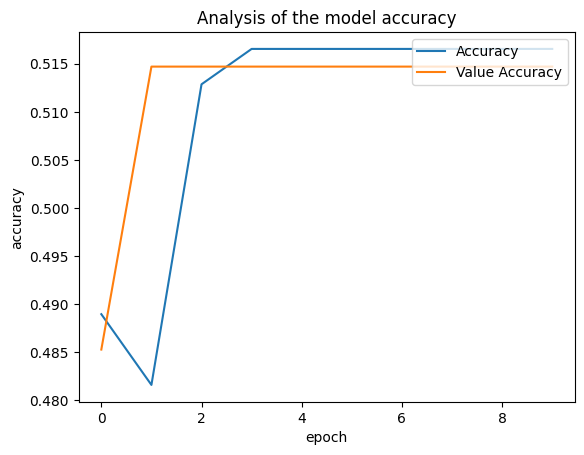

In [48]:
from matplotlib import pyplot as plt
plt.plot(clf.history.history['accuracy'])
plt.plot(clf.history.history['val_accuracy'])
plt.title('Analysis of the model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Value Accuracy'], loc='upper right')
plt.show()

In [49]:
test_loss,test_accuracy = clf.evaluate(X_test,Y_test,verbose=0)
print(f'Test Accuracy:{test_accuracy*100:.2f}%')

Test Accuracy:51.47%
